In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [149]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
     

# EDA

In [ ]:
movie_df = pd.read_csv('ml-100k/u.item', sep='|', encoding='latin-1',
                    names=['movie_id', 'movie_title', 'release_date', 'video_release_date', 'imdb_url', 'unknown', 'action', 
                           'adventure', 'animation', 'childrens', 'comedy', 'crime', 'documentary', 'drama', 'fantasy', 
                           'film_noir', 'horror', 'musical', 'mystery', 'romance', 'sci_fi', 'thriller', 'war', 'western'])

In [ ]:

user_df = pd.read_csv('ml-100k/u.user', sep='|', encoding='latin-1',
                     names=['user_id', 'age', 'gender', 'occupation', 'zip_code'])

In [ ]:
movie_df.describe()

,movie_id,video_release_date,unknown,action,adventure,animation,childrens,comedy,crime,documentary,...,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
count,1682.000000,0.0,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,...,1682.00000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000
mean,841.500000,NaN,0.001189,0.149227,0.080262,0.024970,0.072533,0.300238,0.064804,0.029727,...,0.01308,0.014269,0.054697,0.033294,0.036266,0.146849,0.060048,0.149227,0.042212,0.016052
std,485.695893,NaN,0.034473,0.356418,0.271779,0.156081,0.259445,0.458498,0.246253,0.169882,...,0.11365,0.118632,0.227455,0.179456,0.187008,0.354061,0.237646,0.356418,0.201131,0.125714
min,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,421.250000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,841.500000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1261.750000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
user_df.describe()

,user_id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


1. video_release_date seems containing lots of NaN values.
2. release_date needs to be parsed to datetime.
3. imdb_url contains external links which is not usefull here anyways
4. mean age of user is 34 year
5. minimum age of user is 7 year

In [ ]:
movie_df.release_date = pd.to_datetime(movie_df.release_date)

 check Nan Values

In [ ]:
def check_nan_percent(df):
    columns_null_count = df.isnull().sum()
    null_percent_df = pd.DataFrame({'null_percent': (columns_null_count/df.shape[0])*100, 'total_null': columns_null_count})
    return null_percent_df[null_percent_df.null_percent>0]

In [ ]:
check_nan_percent(movie_df)

,null_percent,total_null
release_date,0.059453,1
video_release_date,100.000000,1682
imdb_url,0.178359,3


fill NaN with mode value 

In [ ]:
rating_df = pd.read_csv('ml-100k/u.data', sep='\t', 
                        names=['user_id', 'movie_id', 'rating', 'timestamp'], 
                        parse_dates=['timestamp'], 
                        )

In [ ]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    100000 non-null  int64 
 1   movie_id   100000 non-null  int64 
 2   rating     100000 non-null  int64 
 3   timestamp  100000 non-null  object
dtypes: int64(3), object(1)
memory usage: 3.1+ MB


In [ ]:
rating_df.describe()

,user_id,movie_id,rating
count,100000.00000,100000.000000,100000.000000
mean,462.48475,425.530130,3.529860
std,266.61442,330.798356,1.125674
min,1.00000,1.000000,1.000000
25%,254.00000,175.000000,3.000000
50%,447.00000,322.000000,4.000000
75%,682.00000,631.000000,4.000000
max,943.00000,1682.000000,5.000000


 Mean Rating is around 3.5

In [ ]:
user_df

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


Add Age group 

In [ ]:
user_df['age_group'] = user_df.age.apply(lambda age: 'Gradeschooler' if 5<=age<=12 else ('Teenager' if 13<=age<=19 else ('Young' if 20<=age<=35 else ('Midlife' if 35<=age<=55 else 'Old'))))
user_df.sample(5)

,user_id,age,gender,occupation,zip_code,age_group
158,159,23,F,student,55346,Young
637,638,45,M,engineer,01940,Midlife
778,779,31,M,student,K7L5J,Young
751,752,60,M,retired,21201,Old
77,78,26,M,administrator,61801,Young


In [ ]:
rating_user_df = rating_df.join(other=user_df, how='inner', on='user_id', lsuffix='_R')
rating_user_movie_df = rating_user_df.join(other=movie_df, how='inner', on='movie_id', rsuffix='_M')
rating_movie_df = rating_df.join(other=movie_df, how='inner', on='movie_id', rsuffix='_M')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

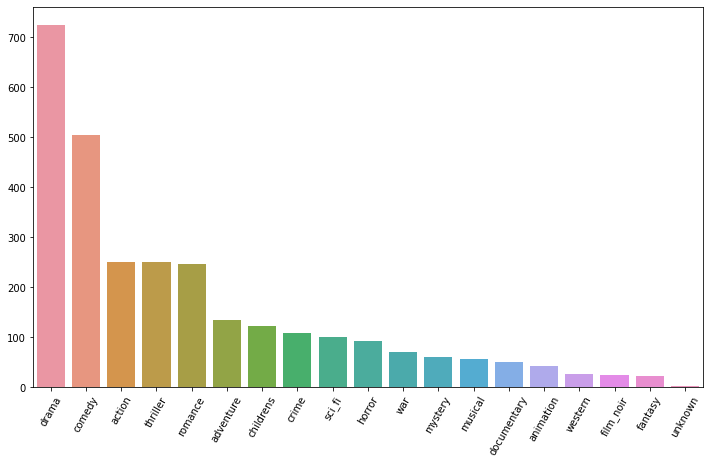

In [ ]:
generes = ['unknown', 'action',
       'adventure', 'animation', 'childrens', 'comedy', 'crime', 'documentary',
       'drama', 'fantasy', 'film_noir', 'horror', 'musical', 'mystery',
       'romance', 'sci_fi', 'thriller', 'war', 'western']

plt.figure(figsize=(12,7))
genere_counts = movie_df.loc[:,generes].sum().sort_values(ascending=False)
sns.barplot(x=genere_counts.index, y=genere_counts.values)
plt.xticks(rotation=60);

drama and comedy are the most common genere type. 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


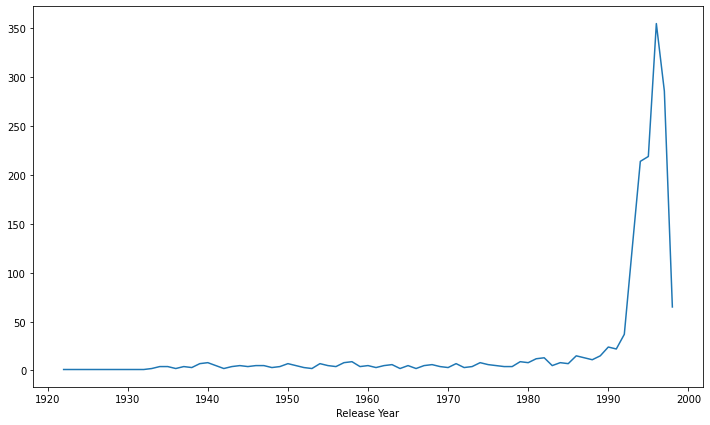

In [ ]:
plt.figure(figsize=(12,7))
yearly_release_counts = movie_df.groupby(movie_df.release_date.dt.year).size().sort_values(ascending=False)
sns.lineplot(yearly_release_counts.index, yearly_release_counts.values);
plt.xlabel('Release Year');

release significantly increased after 80s, people mostly watched movies released in 90s. There is a sudden fall in 1998's record, that might be because of incomplete record

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


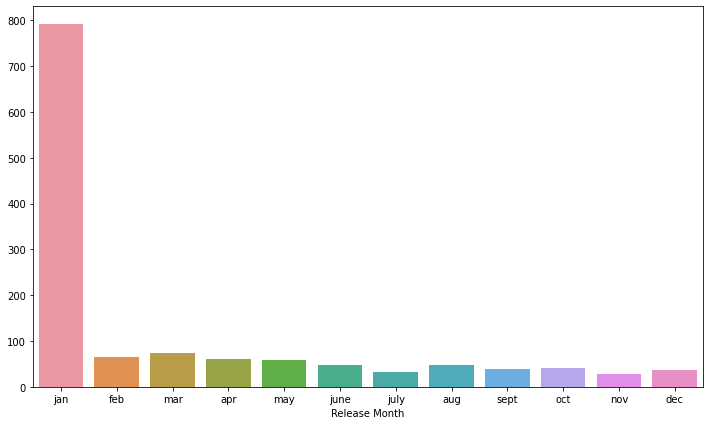

In [ ]:
## consider movie
plt.figure(figsize=(12,7))
monthly_release_counts = movie_df[movie_df.release_date.dt.year > 1990].groupby(movie_df.release_date.dt.month).size()
sns.barplot(['jan', 'feb', 'mar', 'apr', 'may', 'june', 'july', 'aug', 'sept', 'oct', 'nov', 'dec'], monthly_release_counts.values);
plt.xlabel('Release Month');

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


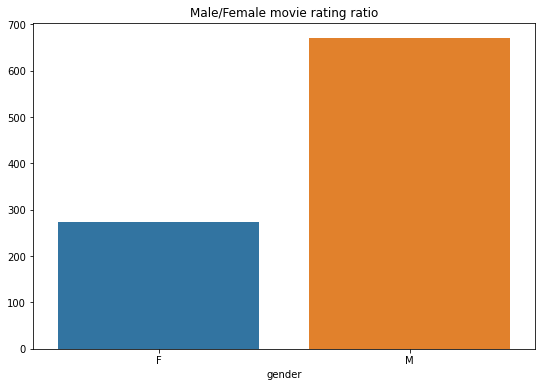

In [ ]:
plt.figure(figsize=(9,6))
sns.barplot(user_df.groupby('gender').size().index, user_df.groupby('gender').size().values)
plt.title('Male/Female movie rating ratio');

Male watches more movies

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


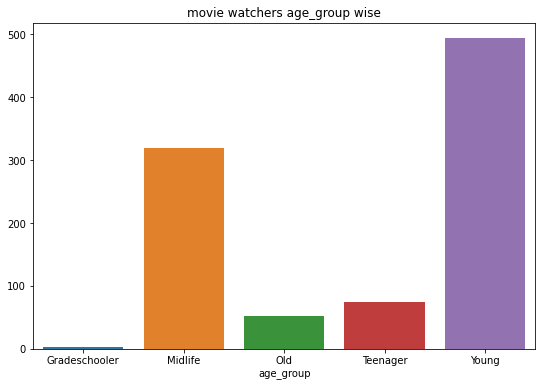

In [ ]:
plt.figure(figsize=(9,6))
sns.barplot(user_df.groupby('age_group').size().index, user_df.groupby('age_group').size().values)
plt.title('movie watchers age_group wise');


 Youngesters are the ones who watches movies mostly and prefers rating them. So overall people from age 20 - 55 watches more movies.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


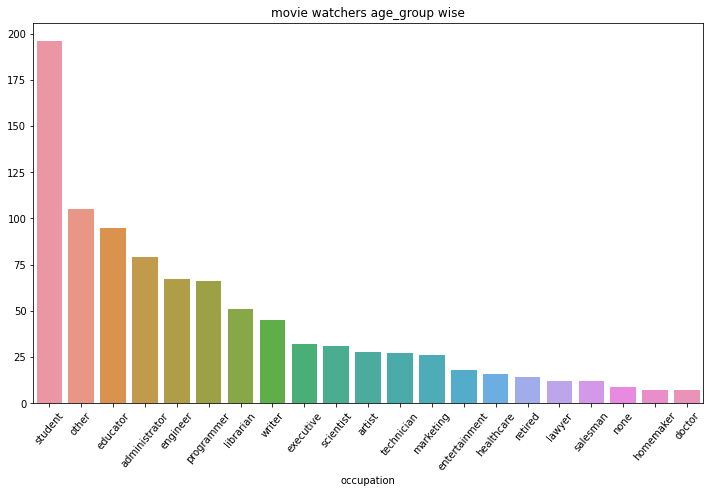

In [ ]:
plt.figure(figsize=(12,7))
movie_watcher_occupants = user_df.groupby('occupation').size().sort_values(ascending=False)
sns.barplot(movie_watcher_occupants.index, movie_watcher_occupants.values)
plt.title('movie watchers age_group wise')
plt.xticks(rotation=50);


## Students watches movies mostly

Most rated movies

In [ ]:
def draw_horizontal_movie_bar(movie_titles, ratings_count, title=''):
    plt.figure(figsize=(12, 7))
    sns.barplot(y=movie_titles, x=ratings_count, orient='h')
    plt.title(title)
    plt.ylabel('Movies')
    plt.xlabel('Count')
    plt.show()

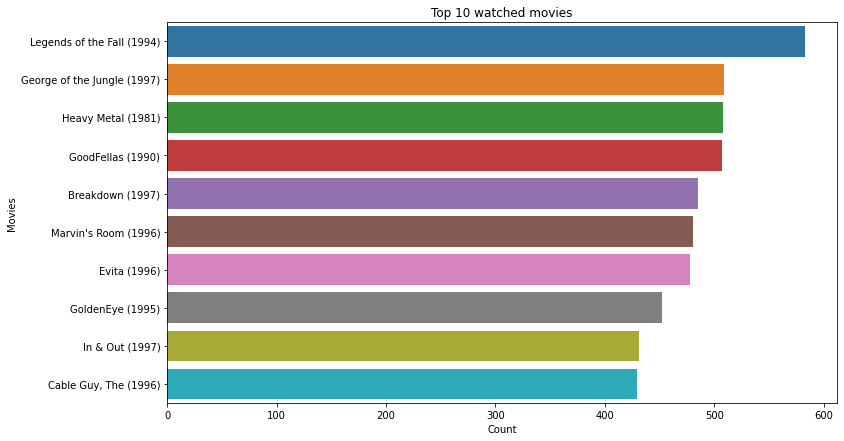

In [ ]:
top_ten_rated_movies = rating_movie_df.groupby('movie_id').size().sort_values(ascending=False)[:10]
top_ten_movie_titles = movie_df.iloc[top_ten_rated_movies.index].movie_title

draw_horizontal_movie_bar(top_ten_movie_titles.values, top_ten_rated_movies.values, 'Top 10 watched movies')

# Main System


In [ ]:
info = pd.read_csv('/content/drive/MyDrive/RS Data/challange/ml-100k/u.info', header=None)
print(info)

                0
0       943 users
1      1682 items
2  100000 ratings


In [ ]:
info=list(info[0])
print(f"Details of users: {info[0]}, Number of items: {info[1]} and total number of ratings involved: {info[2]} ",)
     

Details of users: 9, Number of items: 4 and total number of ratings involved: 3 


In [ ]:
columns = ['user id','movie id','rating','timestamp']
data = pd.read_csv('/content/drive/MyDrive/RS Data/challange/ml-100k/u.data', sep='\t',header=None,names=columns)
data.head() 

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [ ]:
data.shape

(100000, 4)

In [ ]:
data2 = 'movie id | movie title | release date | video release date | IMDb URL | unknown | Action | Adventure | Animation | Children | Comedy | Crime | Documentary | Drama | Fantasy | Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi | Thriller | War | Western'
columns2 = data2.split(' | ')
print(columns2)

['movie id', 'movie title', 'release date', 'video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


In [ ]:
items_data = pd.read_csv('/content/drive/MyDrive/RS Data/challange/ml-100k/u.item', sep='|',header=None,names=columns2,encoding='latin-1')
items_data

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
movies = items_data[['movie id','movie title']]
movies.head()

,movie id,movie title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [ ]:
final_data = pd.merge(data, movies, how='inner', on='movie id')
final_data.drop(labels=['timestamp'],axis='columns',inplace=True)
final_data.head()
     

,user id,movie id,rating,movie title
0,196,242,3,Kolya (1996)
1,63,242,3,Kolya (1996)
2,226,242,5,Kolya (1996)
3,154,242,3,Kolya (1996)
4,306,242,5,Kolya (1996)


In [ ]:
temp = final_data.groupby(by=['user id','movie title'],as_index=False)
final_data

,user id,movie id,rating,movie title
0,196,242,3,Kolya (1996)
1,63,242,3,Kolya (1996)
2,226,242,5,Kolya (1996)
3,154,242,3,Kolya (1996)
4,306,242,5,Kolya (1996)
...,...,...,...,...
99995,840,1674,4,Mamma Roma (1962)
99996,655,1640,3,"Eighth Day, The (1996)"
99997,655,1637,3,Girls Town (1996)
99998,655,1630,3,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [ ]:
final_data2 = final_data.groupby(by=['user id','movie title'], as_index=False).agg({"rating":"mean"})
final_data2.head()

,user id,movie title,rating
0,1,101 Dalmatians (1996),2.0
1,1,12 Angry Men (1957),5.0
2,1,"20,000 Leagues Under the Sea (1954)",3.0
3,1,2001: A Space Odyssey (1968),4.0
4,1,"Abyss, The (1989)",3.0


In [ ]:
final_data2.shape

(99693, 3)

In [ ]:
Users = final_data2['user id'].unique() 
Movies = final_data2['movie title'].unique()

print(f"Total no of unique users: {Users.shape[0]} \n Total no of unique Movies: {Movies.shape[0]} ")

Total no of unique users: 943 
 Total no of unique Movies: 1664 


In [ ]:
users_info = final_data2['user id'].tolist()
movies_names = final_data2['movie title'].tolist()
ratings = final_data2['rating'].tolist()

In [ ]:
movies_dict = {}
for i in range(1664):
  movies_dict[Movies[i]] = i

In [ ]:
movies_users = np.asarray([[np.nan for j in range(len(Users))] for i in range(len(Movies))])
print(f"matrix Shape : {movies_users.shape}")

for i in range(len(ratings)):
  movies_users[movies_dict[movies_names[i]]][users_info[i]-1] = ratings[i]



matrix Shape : (1664, 943)


In [ ]:
movies_users

array([[ 2., nan, nan, ..., nan, nan, nan],
       [ 5., nan, nan, ..., nan, nan, nan],
       [ 3., nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [ ]:
# sources: 
# 1) https://analyticsindiamag.com/singular-value-decomposition-svd-application-recommender-system/
# 2) https://stackoverflow.com/questions/38193958/how-to-properly-mask-a-numpy-2d-array
# 3) https://stackoverflow.com/questions/29241056/how-do-i-use-np-newaxis

MA = np.isnan(movies_users)
Mask = np.ma.masked_array(movies_users, MA)
temp = Mask.T
rating_means = np.mean(temp, axis=0)

final_mat = temp.filled(rating_means)
final_mat = final_mat.T
final_mat = final_mat - rating_means.data[:,np.newaxis]
final_mat = final_mat.T / np.sqrt(len(movies_dict)-1)

In [ ]:
final_mat

array([[-0.02227217,  0.01608636, -0.01226094, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
U, S, V = np.linalg.svd(final_mat)

In [ ]:
case_insensitive_movies_list = [i.lower() for i in Movies]

In [ ]:
def top_cosine_similarity(data, movie_id, top_n=10):
  index = movie_id 
  movie_row = data[index, :]
  magnitude = np.sqrt(np.einsum('ij, ij -> i', data, data))
  similarity = np.dot(movie_row, data.T) / (magnitude[index] * magnitude)
  sort_indexes = np.argsort(-similarity)
  return sort_indexes[:top_n]

In [ ]:
def get_similar_movies(movie_name,top_n,k = 50):
  # k = 50
  # movie_id = 1
  # top_n = 10
  
  sliced = V.T[:, :k] # representative data
  movie_id = movies_dict[movie_name]
  indexes = top_cosine_similarity(sliced, movie_id, top_n)
  print(" ")
  print("Top",top_n,"movies which are very much similar to the Movie-",movie_name, "are: ")
  print(" ")
  for i in indexes[1:]:
    print(Movies[i])

In [141]:
def get_possible_movies(movie):
    temp = ''
    possible_movies = case_insensitive_movies_list
    for i in movie :
      out = []
      temp += i
      for j in possible_movies:
        if temp in j:
          out.append(j)
      if len(out) == 0:
          return possible_movies
      out.sort()
      possible_movies = out.copy()

    return possible_movies

In [146]:
class invalid(Exception):
    pass

def recommender():
    
    try:

      movie_name = input("Enter the Movie name: ")
      movie_name_lower = movie_name.lower()
      if movie_name_lower not in case_insensitive_movies_list :
        raise invalid
      else :
        # movies_list[case_insensitive_country_names.index(movie_name_lower)]
        num_recom = int(input("Enter Number of movie recommendations needed: "))
        get_similar_movies(Movies[case_insensitive_movies_list.index(movie_name_lower)],num_recom)

    except invalid:

      possible_movies = get_possible_movies(movie_name_lower)

      if len(possible_movies) == len(Movies) :
        print("Movie name entered is does not exist in the list ")
      else :
        indices = [case_insensitive_movies_list.index(i) for i in possible_movies]
        print("Entered Movie name is not matching with any movie from the dataset . Please check the below suggestions :\n",[Movies[i] for i in indices])
        print("")
        recommender()

In [151]:

recommender()

Enter the Movie name: mission impossible
Entered Movie name is not matching with any movie from the dataset . Please check the below suggestions :
 ['Mission: Impossible (1996)']

Enter the Movie name: Mission: Impossible (1996)
Enter Number of movie recommendations needed: 10
 
Top 10 movies which are very much similar to the Movie- Mission: Impossible (1996) are: 
 
Ed Wood (1994)
Nutty Professor, The (1996)
Above the Rim (1994)
Nightmare Before Christmas, The (1993)
Wes Craven's New Nightmare (1994)
Pagemaster, The (1994)
39 Steps, The (1935)
GoldenEye (1995)
Rock, The (1996)
